# Data-X project : Commodity Price Forecasting

#### Clement's notebook

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data source

In [3]:
df = pd.read_csv("metals_daily_train.csv")

In [4]:
df.describe()

,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
count,2.633000e+03,2360.000000,2360.000000,2360.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,...,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2633.000000,2.633000e+03
mean,2.013009e+07,477.936862,499.797818,486.364574,20.964078,21.541850,20.431452,20.936716,21.608640,22.063155,...,16757.833125,16900.573450,16613.373283,16757.111111,16791.377861,16938.957553,16643.593009,16790.220558,2265.748576,2.013004e+07
std,2.872433e+04,99.857689,97.626663,98.368382,8.297076,8.603851,8.034878,8.325021,7.569017,7.780929,...,3676.826724,3721.727138,3624.266259,3671.746128,3653.336963,3697.413360,3599.290043,3647.258673,148.620935,2.873209e+04
min,2.008070e+07,227.076039,261.009561,248.225419,11.250000,11.350000,11.100000,11.175000,12.150000,12.250000,...,8315.000000,8980.000000,8315.000000,8665.000000,8400.000000,8940.000000,8400.000000,8715.000000,2008.000000,2.008063e+07
25%,2.010122e+07,421.463849,447.606938,430.819771,15.400000,15.700000,15.100000,15.400000,16.350000,16.600000,...,14745.000000,14810.000000,14668.000000,14745.000000,14763.500000,14830.000000,14680.000000,14760.000000,2137.000000,2.010122e+07
50%,2.013061e+07,488.166240,516.953924,497.898846,18.350000,18.900000,17.850000,18.300000,19.160000,19.650000,...,15607.000000,15720.000000,15535.000000,15635.000000,15700.000000,15795.000000,15585.000000,15685.000000,2265.000000,2.013060e+07
75%,2.015113e+07,555.784731,571.196938,562.304544,23.900000,24.750000,23.300000,23.950000,24.850000,25.420000,...,18025.000000,18177.500000,17877.500000,18043.000000,18183.500000,18320.000000,18007.000000,18202.500000,2394.000000,2.015112e+07
max,2.018052e+07,645.057249,670.873485,654.272352,65.860000,67.890000,62.650000,66.230000,59.440000,60.870000,...,27065.000000,27235.000000,26700.000000,26915.000000,27000.000000,27750.000000,26650.000000,26865.000000,2523.000000,2.018051e+07


In [5]:
df.shape

(2633, 558)

In [6]:
df.tail(10)

,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
2623,20180507,555.734038,570.499919,578.554035,16.40,16.50,16.12,16.325,16.80,16.85,...,23200.0,23925.0,23145.0,23570.0,23050.0,23835.0,23010.0,23470.0,2522,20180507
2624,20180508,557.734102,571.205940,579.289043,16.35,16.57,16.20,16.225,16.78,16.95,...,23875.0,24000.0,23790.0,23880.0,23840.0,23950.0,23720.0,23810.0,2522,20180507
2625,20180509,556.268995,564.330865,572.392734,16.25,16.36,15.55,15.625,16.70,16.76,...,23750.0,23940.0,23605.0,23800.0,23675.0,23865.0,23495.0,23715.0,2522,20180507
2626,20180510,551.499501,563.576132,571.627220,15.60,15.75,14.85,15.075,16.16,16.27,...,23850.0,23960.0,23760.0,23860.0,23780.0,23890.0,23670.0,23780.0,2522,20180507
2627,20180511,554.157735,567.608165,577.023466,15.12,15.20,14.65,14.700,15.67,15.70,...,23900.0,23960.0,23695.0,23800.0,23830.0,23880.0,23585.0,23700.0,2522,20180507
2628,20180514,555.885726,581.521233,582.870470,14.65,14.70,14.20,14.475,15.35,15.35,...,23880.0,23910.0,23630.0,23755.0,23745.0,23820.0,23515.0,23665.0,2523,20180514
2629,20180515,558.735883,584.378351,581.679143,14.45,15.50,14.40,15.325,14.96,15.85,...,23605.0,23880.0,23560.0,23760.0,23480.0,23795.0,23450.0,23640.0,2523,20180514
2630,20180516,560.979551,583.904196,583.904196,15.30,15.42,14.60,14.675,15.76,15.83,...,23800.0,24050.0,23730.0,23890.0,23695.0,23980.0,23630.0,23790.0,2523,20180514
2631,20180517,558.631274,584.145683,582.802820,14.65,14.86,14.27,14.375,15.33,15.45,...,23825.0,24000.0,23640.0,23845.0,23745.0,23930.0,23530.0,23755.0,2523,20180514
2632,20180518,559.704335,585.267754,585.267754,14.35,14.80,14.22,14.525,15.07,15.36,...,23660.0,23930.0,23660.0,23815.0,23590.0,23820.0,23560.0,23700.0,2523,20180514


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633 entries, 0 to 2632
Columns: 558 entries, date to week_date
dtypes: float64(555), int64(3)
memory usage: 11.2 MB


In [8]:
df.isnull().sum()

date             0
p0             273
p1             273
p2             273
f000_open      144
f000_high      144
f000_low       144
f000_settle    144
f001_open      144
f001_high      144
f001_low       144
f001_settle    144
f002_open      142
f002_high      142
f002_low       142
f002_settle    142
f003_open      149
f003_high      149
f003_low       149
f003_settle    149
f004_open      149
f004_high      149
f004_low       149
f004_settle    149
f005_open      144
f005_high      144
f005_low       144
f005_settle    144
f006_open      144
f006_high      144
              ... 
f131_open      228
f131_high      228
f131_low       228
f131_settle    228
f132_open      228
f132_high      228
f132_low       228
f132_settle    228
f133_open      228
f133_high      228
f133_low       228
f133_settle    228
f134_open      228
f134_high      228
f134_low       228
f134_settle    228
f135_open      228
f135_high      228
f135_low       228
f135_settle    228
f136_open      230
f136_high   

# Missing Values

In [9]:
# Other team's work to fill the NaNs value
# We will just get rid of them for now

print('dataframe size before cut NaN', df.shape)
df = df.dropna(axis=0, how='any')
print('dataframe size after cut NaN', df.shape)

dataframe size before cut NaN (2633, 558)
dataframe size after cut NaN (2105, 558)


# Pre-Process

In [10]:
# We are predicting p1 only
df = df.drop(['p0', 'p2'], axis=1)

# Exploration

### What does p1 look like?

In [11]:
df.p1.describe()

count    2105.000000
mean      498.505181
std        97.873163
min       261.009561
25%       444.634823
50%       516.253262
75%       570.278054
max       669.933261
Name: p1, dtype: float64

mean(diff): 0.0609483163023
std(diff): 4.17317435666


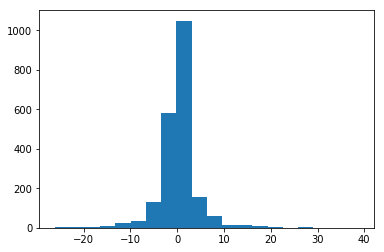

In [12]:
# some stats on the next-previous day difference
p1 = df.p1.values
diff = np.diff(p1)

print('mean(diff):', diff.mean())
print('std(diff):', diff.std())

plt.hist(diff, bins=20)
plt.show()

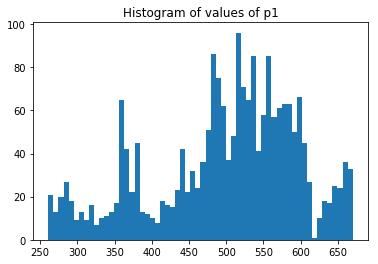

In [13]:
# bins size of the order of the diff std

plt.hist(df.p1, bins=60)
plt.title('Histogram of values of p1')
plt.show()

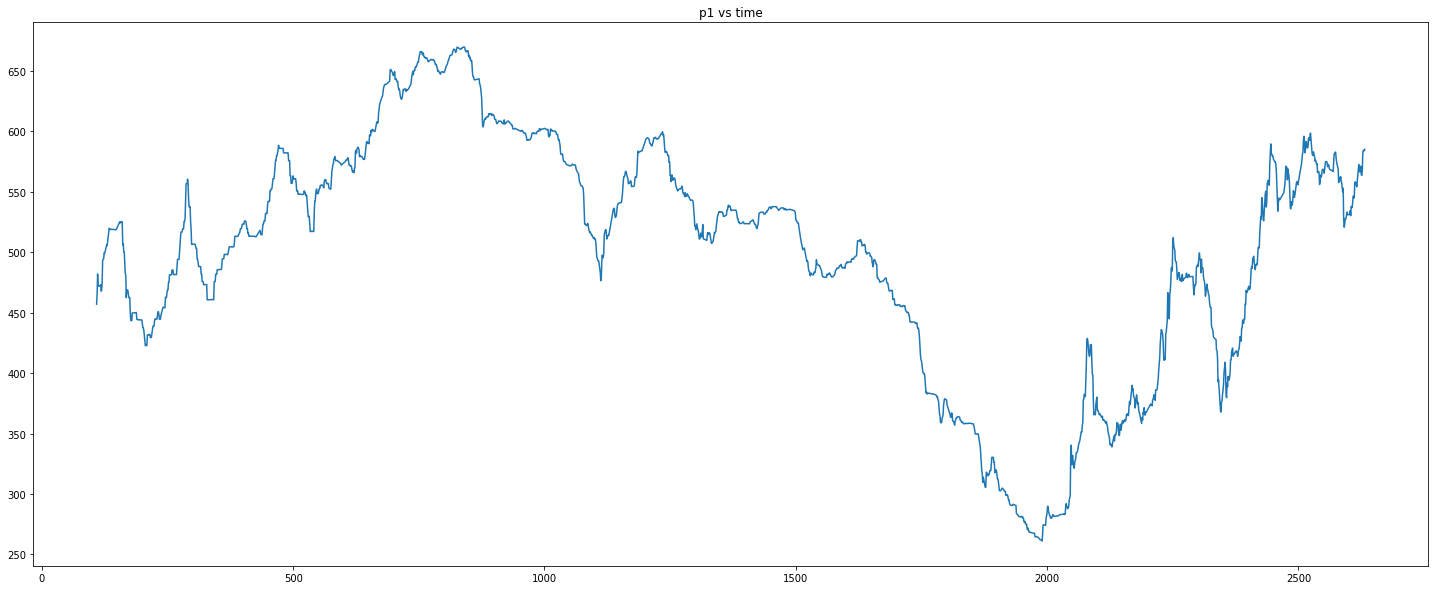

In [14]:
plt.figure(figsize=(25,10))
plt.plot(df['p1'])
plt.title('p1 vs time')
plt.show()

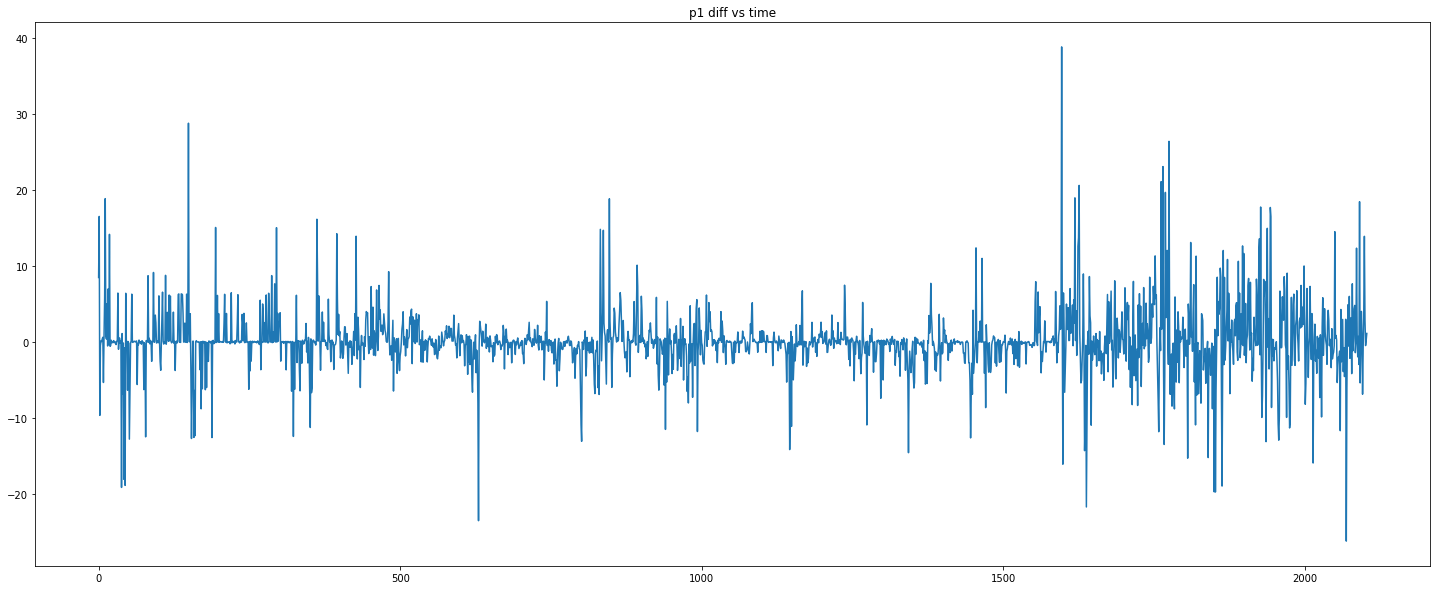

In [15]:
plt.figure(figsize=(25,10))
plt.plot(diff)
plt.title('p1 diff vs time')
plt.show()

### Correlations

#### Assumption

* use setlle price + score function

In [22]:
# we will correlate with settle prices

keep_col = [0, 1] + list(range(5, 557, 4))
selected_columns = df.iloc[:, keep_col].columns
selected_columns

Index(['date', 'p1', 'f000_settle', 'f001_settle', 'f002_settle',
       'f003_settle', 'f004_settle', 'f005_settle', 'f006_settle',
       'f007_settle',
       ...
       'f128_settle', 'f129_settle', 'f130_settle', 'f131_settle',
       'f132_settle', 'f133_settle', 'f134_settle', 'f135_settle',
       'f136_settle', 'f137_settle'],
      dtype='object', length=140)

In [23]:
# dataframe that will store all different types of correlations

df_cor = pd.DataFrame(columns=['pearson', 'spearman', 'kendall'])

df_cor['pearson'] = df[selected_columns].corr(method='pearson')['p1']
df_cor['spearman'] = df[selected_columns].corr(method='spearman')['p1']
df_cor['kendall'] = df[selected_columns].corr(method='kendall')['p1']

df_cor.head(15)

,pearson,spearman,kendall
date,-0.423089,-0.381824,-0.260212
p1,1.000000,1.000000,1.000000
f000_settle,0.128407,0.185512,0.105564
f001_settle,0.159587,0.205912,0.110930
f002_settle,0.733474,0.755257,0.554741
f003_settle,0.745260,0.771543,0.594985
f004_settle,0.746359,0.773334,0.597158
f005_settle,0.308825,0.325800,0.201124
f006_settle,0.309968,0.324766,0.200215
f007_settle,0.587130,0.528950,0.368154


In [24]:
# Rank features by how much they correlate with the 3 different methods
# score = mean absolute correlation 

df_cor['score'] = (abs(df_cor['pearson']) + abs(df_cor['spearman']) + abs(df_cor['kendall'])) / 3

#### Features with best/worse correlation

In [25]:
# Top features non-correlated
df_cor.sort_values(by='score').head(15)

,pearson,spearman,kendall,score
f019_settle,0.026701,0.088848,0.026512,0.047354
f122_settle,-0.083456,-0.060959,-0.040706,0.061707
f025_settle,0.060652,0.097508,0.035952,0.064704
f036_settle,0.111894,0.052532,0.057373,0.073933
f123_settle,-0.117164,-0.100249,-0.069746,0.095720
f020_settle,0.050305,0.179401,0.084202,0.104636
f037_settle,0.155144,0.109700,0.084461,0.116435
f072_settle,-0.170175,-0.117848,-0.099528,0.129184
f000_settle,0.128407,0.185512,0.105564,0.139828
f023_settle,0.006283,0.257937,0.168771,0.144330


In [38]:
# Top features non-correlated
df_cor.sort_values(by='score', ascending=False).head(15)

,pearson,spearman,kendall,score
p1,1.000000,1.000000,1.000000,1.000000
f091_settle,0.897847,0.914676,0.757606,0.856709
f090_settle,0.889075,0.903352,0.740498,0.844308
f131_settle,0.860636,0.862397,0.682163,0.801732
f132_settle,0.816170,0.885137,0.702668,0.801325
f130_settle,0.861290,0.860914,0.680470,0.800891
f133_settle,0.812336,0.885448,0.702769,0.800184
f029_settle,0.795237,0.859152,0.662546,0.772312
f028_settle,0.792376,0.856151,0.658733,0.769087
f135_settle,0.761897,0.792620,0.621206,0.725241


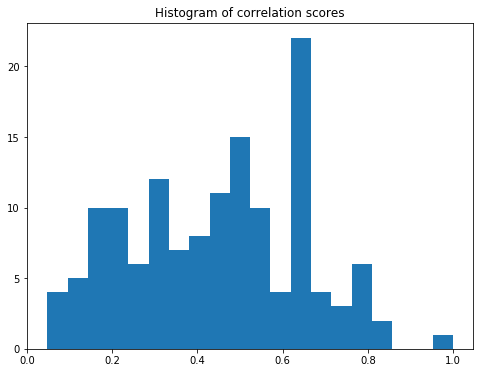

In [27]:
plt.figure(figsize=(8,6))
plt.hist(df_cor['score'], bins=20)
plt.title('Histogram of correlation scores')
plt.show()

#### All vs All visualization

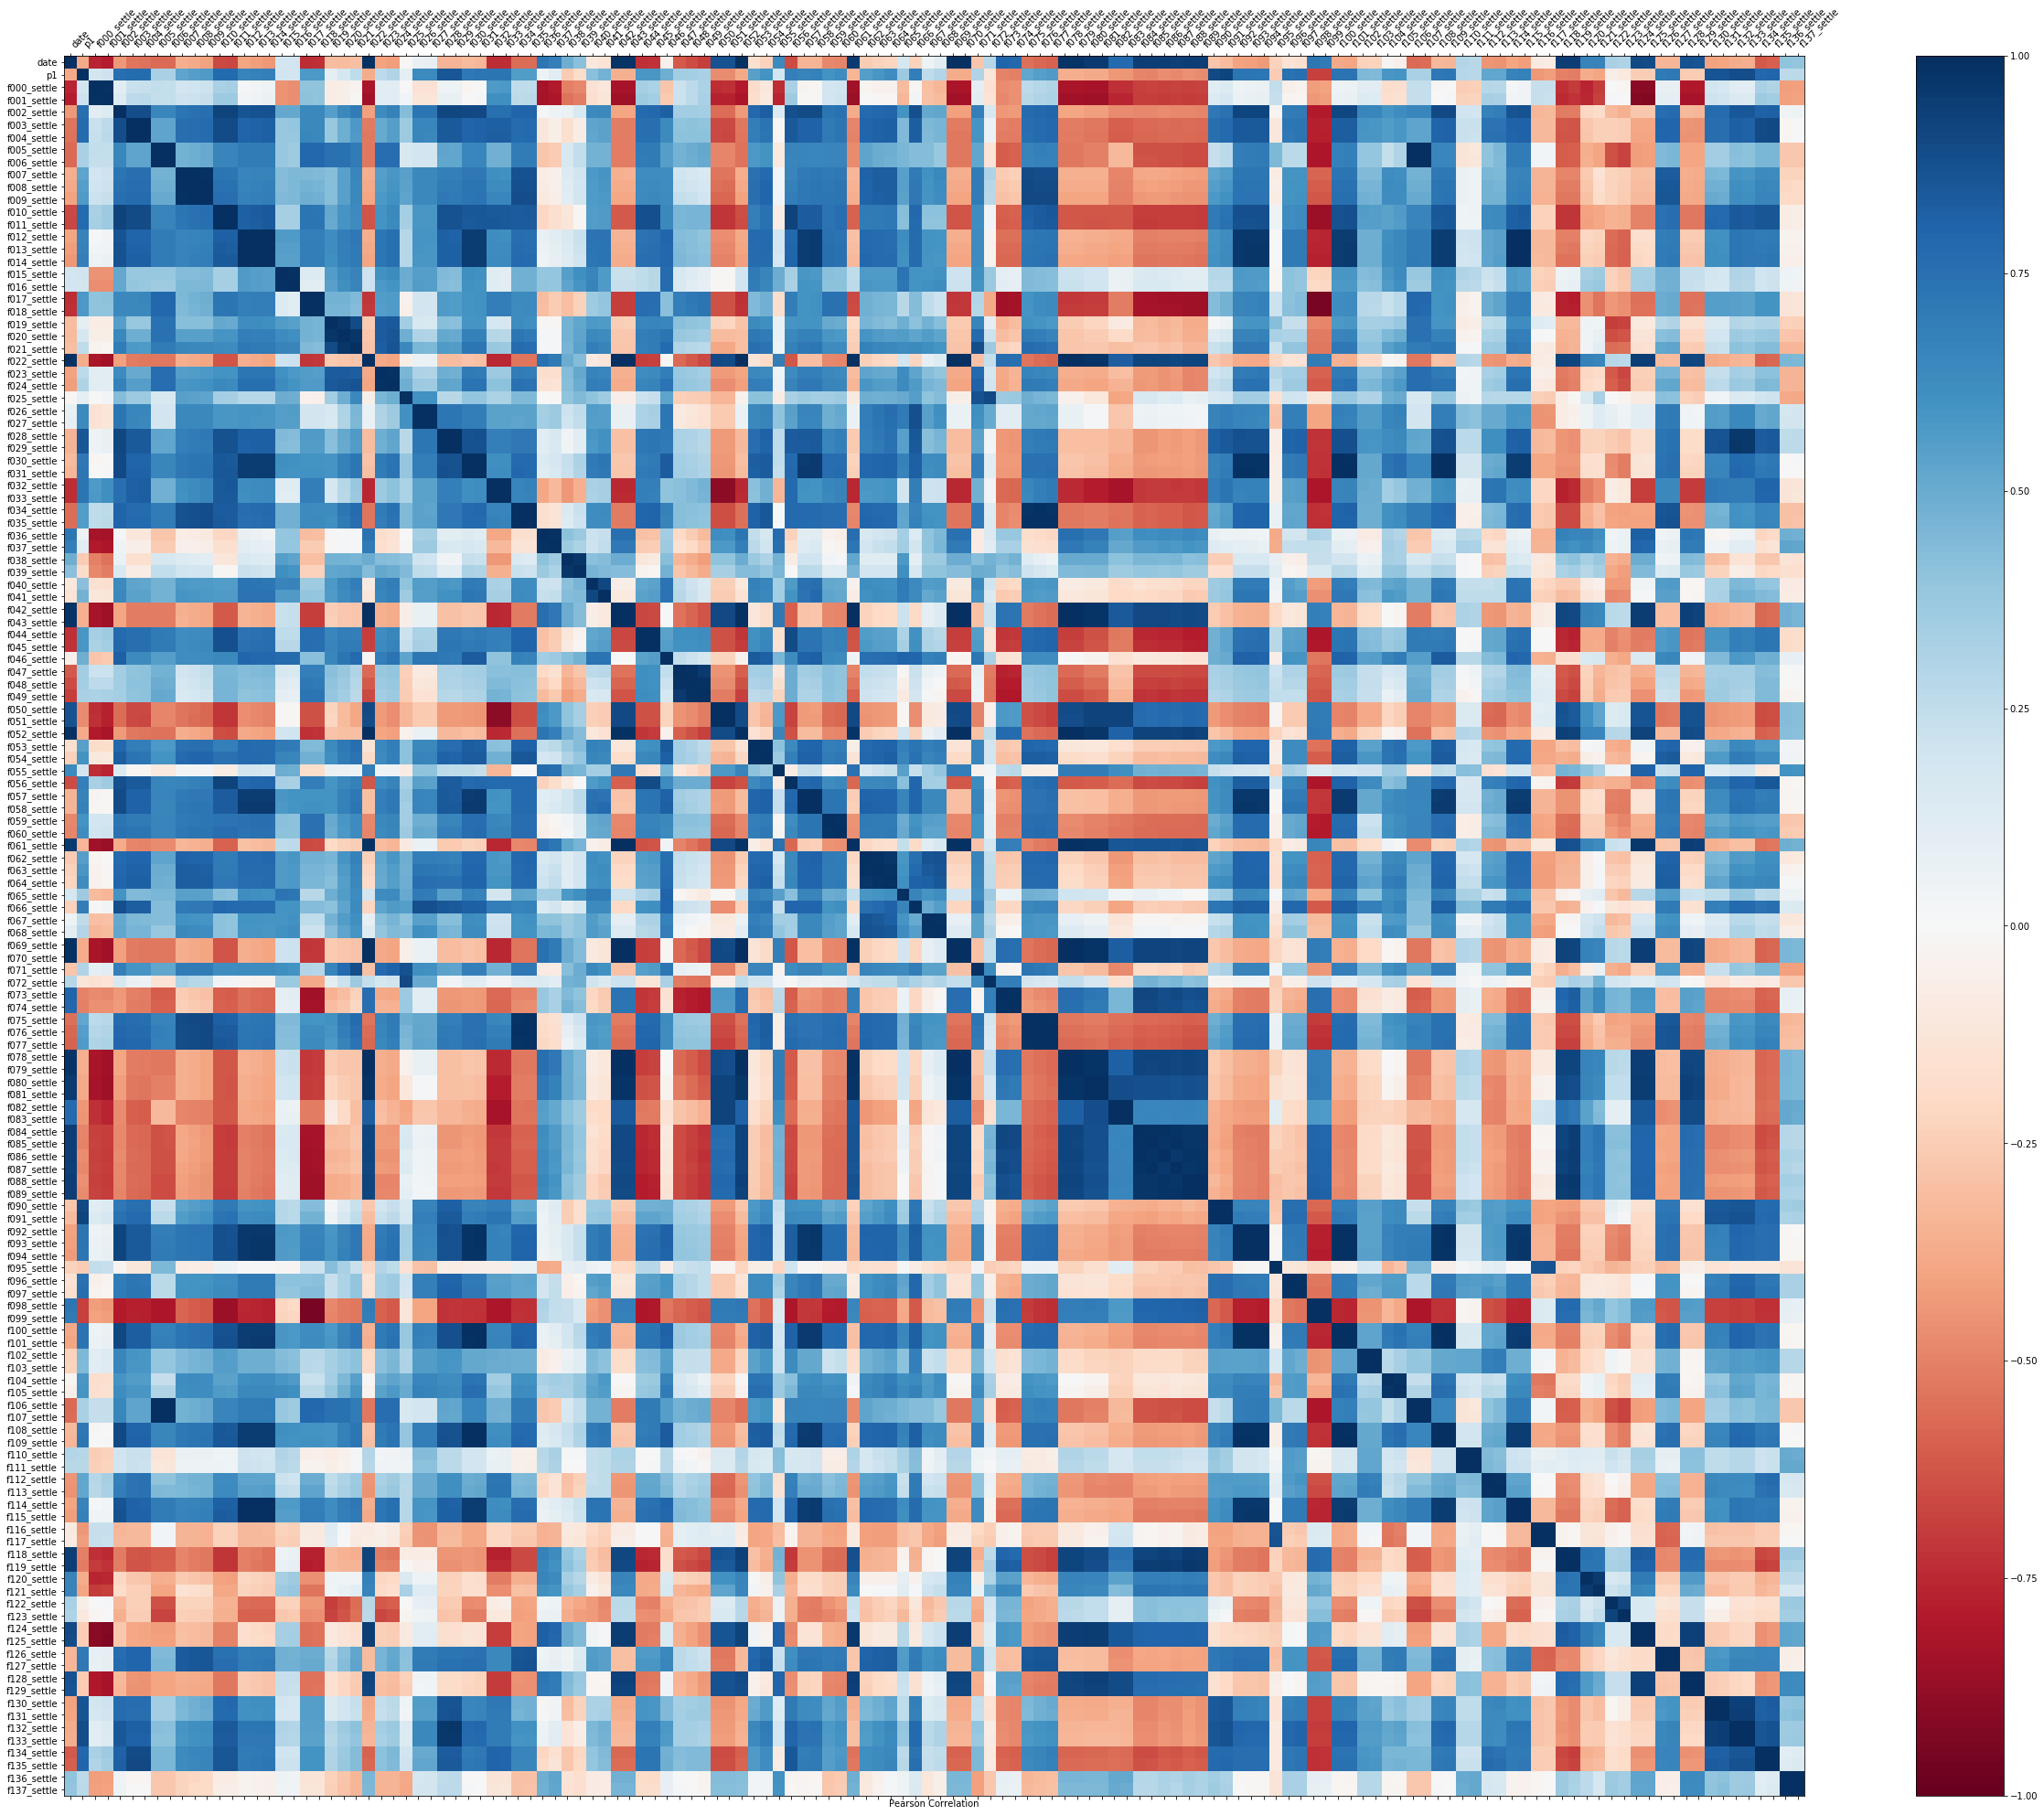

In [28]:
fig = plt.figure(figsize=(55,35))

correlations = df[selected_columns].corr(method='spearman')
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

ticks = np.arange(0,len(selected_columns),1)
ax.set_xlabel('Pearson Correlation')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(selected_columns, rotation=45, ha='left')
ax.set_yticklabels(selected_columns)
plt.show()

#### p1 vs All

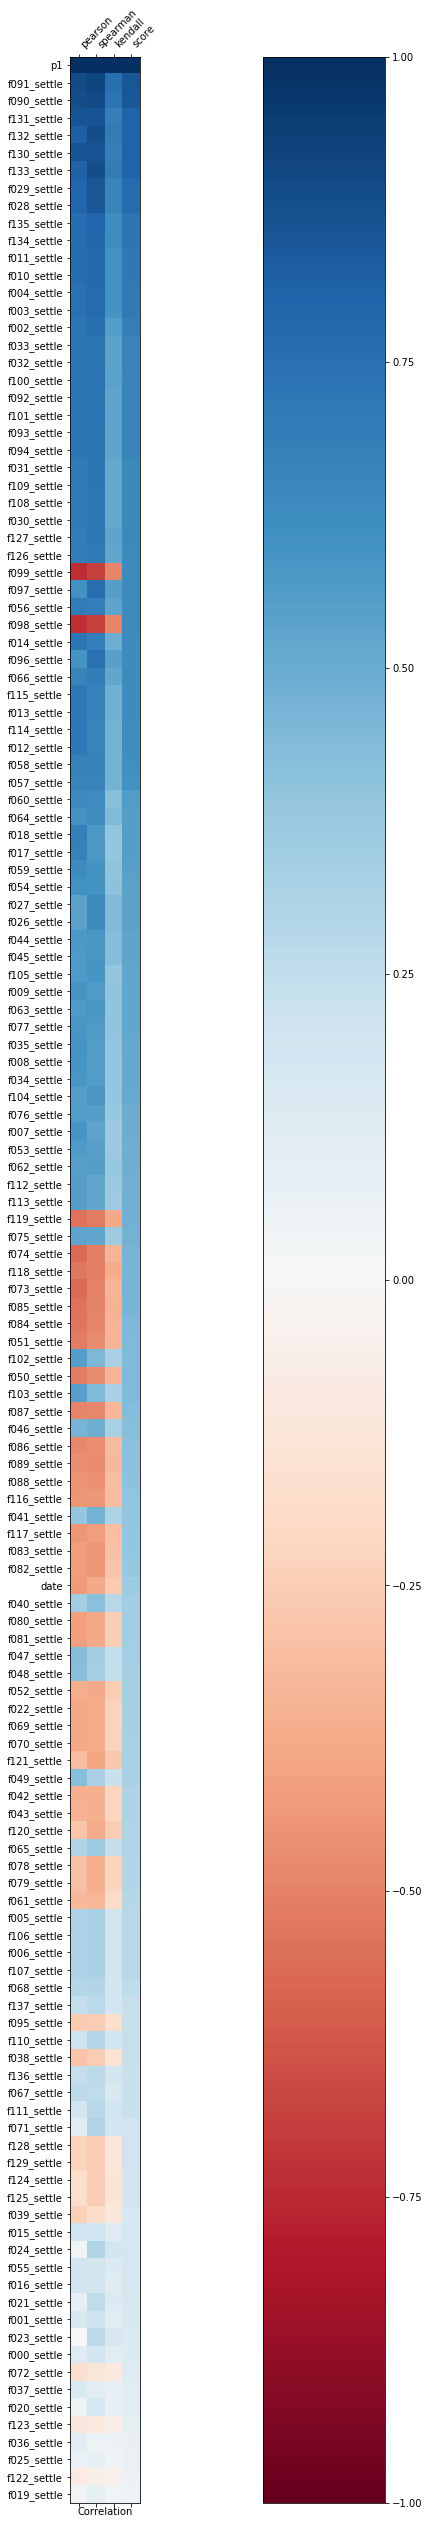

In [186]:
df_cor_sort = df_cor.sort_values(by='score', ascending=False)

fig = plt.figure(figsize=(55,45))
ax = fig.add_subplot(111)
cax = ax.matshow(df_cor_sort, cmap='RdBu',vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

xticks = np.arange(0,len(df_cor_sort.columns),1)
yticks = np.arange(0,len(df_cor_sort.index),1)
ax.set_xlabel('Correlation')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(df_cor_sort.columns, rotation=45, ha='left')
ax.set_yticklabels(df_cor_sort.index)
plt.show()

In [35]:
df_cor.index[:10]

#df_cor

Index(['date', 'p1', 'f000_settle', 'f001_settle', 'f002_settle',
       'f003_settle', 'f004_settle', 'f005_settle', 'f006_settle',
       'f007_settle'],
      dtype='object')

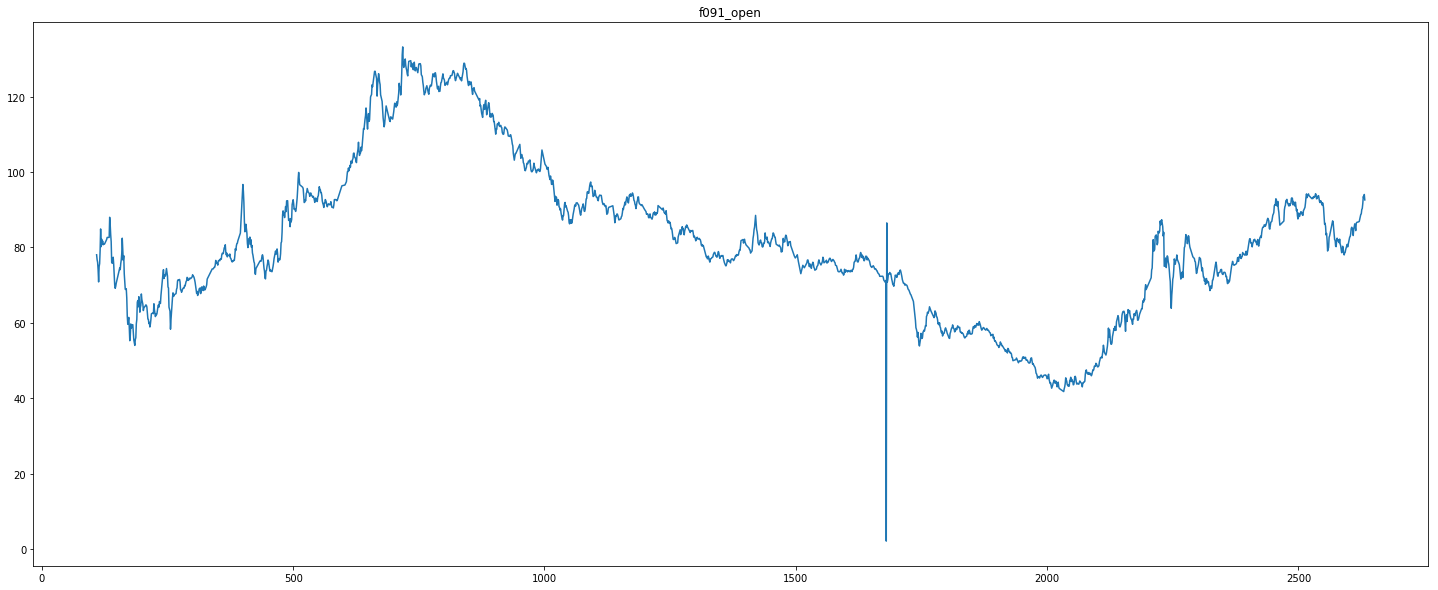

In [187]:
# example of a very score-correlated feature

plt.figure(figsize=(25,10))
plt.plot(df['f091_open'])
plt.title('f091_open')
plt.show()

### Autocorrelation

That is the correlations between the current price and the price _lag_ days before

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


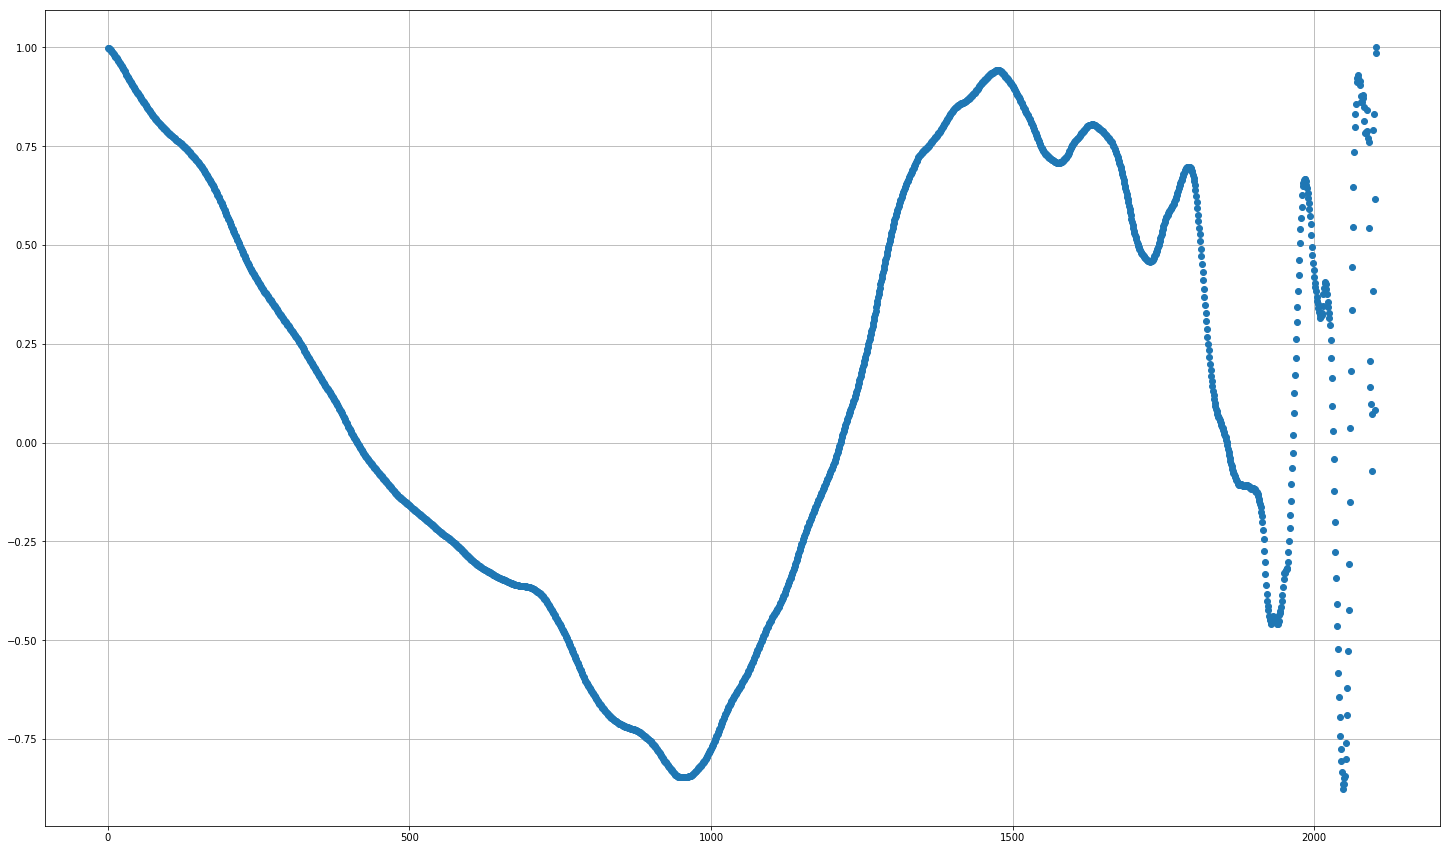

In [247]:
def autocorr(series, lag):
    return np.corrcoef(series[:-lag], series[lag:])[0,1]

def autocorr_plot(series):
    autocorr_values = []
    lag_range = np.arange(1, series.shape[0])
    for lag in lag_range:
        autocorr_values.append(autocorr(series, lag))
    plt.figure(figsize=(25,15))
    plt.plot(lag_range, autocorr_values, 'o')
    plt.grid()
    plt.show()
    
autocorr_plot(p1)

# Feature selection

In [51]:
file_name = 'metals_daily_train.csv'

def open_file():
    pass


def clean_dataframe():
    pass


def top_correlated(df, nb_features, threshold, correlation_method=3):
    """Select top 20 correlated features from dataframe"""
    
    # select settle prices only
    keep_col = [0, 1] + list(range(5, 557, 4))
    selected_columns = df.iloc[:, keep_col].columns
    
    # compute correlation matrix
    df_cor = pd.DataFrame(columns=['pearson', 'spearman', 'kendall'])
    df_cor['pearson'] = df[selected_columns].corr(method='pearson')['p1']
    df_cor['spearman'] = df[selected_columns].corr(method='spearman')['p1']
    df_cor['kendall'] = df[selected_columns].corr(method='kendall')['p1']
    df_cor['score'] = (abs(df_cor['pearson']) + abs(df_cor['spearman']) + abs(df_cor['kendall'])) / 3
    
    # sort depending on the correlation_method 
    col = df_cor.columns[correlation_method]
    df_cor_sorted = df_cor.sort_values(by=col, ascending=False)[col]    
    
    # retrieve the top nb_features correlated with p1
    selected_features = df_cor_sorted.index[:nb_features] 
    
    # eliminate features that are too correlated to each other
    df_cor_count = df_cor.loc[selected_features].copy()
    df_cor_count[df_cor_count < threshold] = 0
    df_cor_count[df_cor_count >= threshold] = 1
    df_cor_count = df_cor_count.sum(axis=1)
    df_cor_count = df_cor_count.sort_values(ascending=False)
    selected_features = df_cor_count.index[:20]
    
    return selected_features

def pca_selection(df, n=20):
    scaler=StandardScaler()
    scaler.fit(df)
    pass

In [52]:
top_correlated(df, 50, 0.7)

Index(['p1', 'f091_settle', 'f090_settle', 'f132_settle', 'f133_settle',
       'f135_settle', 'f003_settle', 'f004_settle', 'f010_settle',
       'f134_settle', 'f011_settle', 'f028_settle', 'f029_settle',
       'f130_settle', 'f131_settle', 'f031_settle', 'f002_settle',
       'f033_settle', 'f032_settle', 'f100_settle'],
      dtype='object')